In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import sin, cos
from scipy import integrate

import numpy as np

# to make the plot interactive in jupyter lab:
# conda install -c conda-forge ipympl  
# and restart jupyter lab

# widget for interactive window in notebook
# for external window use "%matplotlib qt" 
%matplotlib widget

# 2D Intergration - double integral

For a function  $f(x,y): \mathbb{R}^2 \rightarrow \mathbb{R}$

The double definite integral would look like this:

### $$ \int_c^d \int_a^b f(x,y) \,dx \, dy$$

with $a,b,c,d \in \mathbb{R}$

## Example for a definite 2D integral calculation:

$$
\int_{-2}^{2} \int_{-2}^{2} f(x,y) \,dx \, dy
$$

Using the for example the function
$$f(x,y) = x^2 + y^2$$

Calculation by hand:

$
\int_{-2}^{2} \int_{-2}^{2} x^2 + y^2 \,dx \, dy =\\
= \int_{-2}^{2} \left(\int_{-2}^{2} x^2 \, dx + \int_{-2}^{2} y^2 \,dx \right) \, dy \\
= \int_{-2}^{2} \left( \left[ \frac{x^3}{3} \right]_{-2}^{2} + \left[ xy^2 \right]_{-2}^{2} \right) \, dy \\
= \int_{-2}^{2} \left( \left( \frac{2^3}{3} - \frac{(-2)^3}{3}  \right) + \left( 2y^2 - (-2)y^2 \right) \right) \, dy \\
= \int_{-2}^{2} \left( \frac{16}{3} + 4y^2 \right) \, dy \\
= \int_{-2}^{2} \frac{16}{3} \, dy + 4 \int_{-2}^{2} y^2 \, dy \\
= \frac{16}{3} \left[y \right]_{-2}^{2} + 4\left[\frac{y^3}{3}\right]_{-2}^{2} \\
= \frac{16}{3} \left(2 - (-2) \right) + 4 \left( \frac{2^3}{3} - \frac{(-2)^3}{3} \right) \\
= \frac{64}{3} + 4 \frac{16}{3}  = \frac{128}{3} = 42.\bar6
$

We use the integration rules we know from 1D integration and apply them first to the inner integral. In this case to $\int_{-2}^{2} x^2 + y^2 \,dx$, while treating y like a constant.

After this integral is calculated we use the result and integrate w.r.t to $y$ (the integral that is left over).

# Code

### Define a function that will be integrated

In [2]:
def f(x, y):
    return x ** 2 + y ** 2

## Rectangle rule

Representing this: $\int_c^d \int_a^b f(x,y) \, dx \, dy $ 

Using the rectangle rule:

#### $$ \frac{b-a}{n} \cdot \frac{d-c}{n}\sum_{k=0}^{n-1} \frac{ f\left(a + k\frac{b-a}{n} , c + k\frac{d-c}{n}\right) + f\left(a + (k+1)\frac{b-a}{n} , c + k\frac{d-c}{n}\right) + f\left(a + k\frac{b-a}{n} , c + (k+1)\frac{d-c}{n}\right) + f\left(a + (k+1)\frac{b-a}{n} , c + (k+1)\frac{d-c}{n}\right)) }{4}$$


The part in the sum is the function evalutated at the four corners of the current rectangle and then calculating the average height for this rectangle.
Then this is used to calculate the volume of the cuboid.

In [3]:
def get_cube_coords(x1, x2, y1, y2, z1, z2):
    """
    Helper function that creates the coordinates for each of the rectangles
    that are then plotted with plot_surface
    """
    x = [
        [x1, x2, x2, x1, x1],  # x coordinate of points in bottom surface
        [x1, x2, x2, x1, x1],  # x coordinate of points in upper surface
        [x1, x2, x2, x1, x1],  # x coordinate of points in outside surface
        [x1, x2, x2, x1, x1]]  # x coordinate of points in inside surface
    y = [
        [y1, y1, y2, y2, y1],  # y coordinate of points in bottom surface
        [y1, y1, y2, y2, y1],  # y coordinate of points in upper surface
        [y1, y1, y1, y1, y1],  # y coordinate of points in outside surface
        [y2, y2, y2, y2, y2]]  # y coordinate of points in inside surface
    z = [
        [z1, z1, z1, z1, z1],  # z coordinate of points in bottom surface
        [z2, z2, z2, z2, z2],  # z coordinate of points in upper surface
        [z1, z1, z2, z2, z1],  # z coordinate of points in outside surface
        [z1, z1, z2, z2, z1],
    ]  # z coordinate of points in inside surface
    
    return x, y, z

Function that does the rectangle integration:

In [4]:
def rectangle_integration_2d(f, n=5, x_start=0, x_end=1, y_start=0, y_end=1):
    """
    Calculates the area under given function f using the rectangle method,
    also returns coordinates of the rectangeles used for the calculation

    :param f: function that will be integrated
    :param n: number of steps
    :param x_start: start value x axis
    :param x_end: end value x axis
    :param y_start: start value y axis
    :param y_end: end value y axis
    :return: volume of area under function and numpy array of rectangle coordinates
    """

    # length of the steps in x,y
    x_step = (x_end - x_start) / n
    y_step = (y_end - y_start) / n

    # "left" value of current rectangle in x,y
    x1 = x_start
    y1 = y_start

    # init volume with 0
    volume = 0

    # save coordinates of the cubes
    cube_coordinates = []

    # x axis iteration
    for _ in range(0, n):
        # "right" value of current rectangle in x
        x2 = x1 + x_step

        # y axis iteration
        for _ in range(0, n):
            # "right" value of current rectangle in y
            y2 = y1 + y_step
            
            # get function results at the four corners
            f1 = f(x1, y1)
            f2 = f(x1, y2)
            f3 = f(x2, y1)
            f4 = f(x2, y2)
            
            # average height of the function w.r.t the four corners
            f_mid = (f1+f2+f3+f4) / 4 
            
            # add current cube to volume
            volume += f_mid * x_step * y_step
            # save coords of cube
            # format {x_1: 0, x_2: 1, y_1: 1, y_2: 1, z: 1}
            coords = get_cube_coords(x1, x2, y1, y2, 0, f_mid)
            cube_coordinates.append(coords)

            # change next left value to current right... go to next rectangle
            y1 = y2
        # reset left value after going over y axis
        y1 = y_start

        # change next left value to current right... go to next rectangle
        x1 = x2

    return volume, np.array(cube_coordinates)


## Plotting the rectangle rule

In [19]:
def plot_3d(f, method='rectangle', n=5, x_start=0, x_end=1, y_start=0, y_end=1, scale=1.3, plot_method=True):
    """
    Calculates the area under given function f using the specified method,
    also returns coordinates of the rectangeles used for the calculation
    
    :param method: either 'rectangle' or 'trapezoid' 
    :param f: function that will be integrated
    :param n: number of steps
    :param x_start: start value x axis
    :param x_end: end value x axis
    :param y_start: start value y axis
    :param y_end: end value y axis
    :param scale: controls the plotted area of the function with respect to the x,y start/ end values
    :param plot_method: plots the cuboids/ trapezoids if True  
    :return: volume of area under function and numpy array of rectangle coordinates
    """
    # get the integration values and coordinates
    if method == 'rectangle':
        res, coordinates = rectangle_integration_2d(f, n, x_start, x_end, y_start, y_end)
        form = 'cuboids'
    elif method == 'trapezoid':
        res, coordinates = trapezoid_integration_2d(f, n, x_start, x_end, y_start, y_end)
        form = 'trapezoids'
    else:
        raise ValueError(f"The method '{method}' is not defined")
    
    
    # values for plotting the function
    x = np.linspace(x_start*scale, x_end*scale, num=n)
    y = np.linspace(y_start*scale, y_end*scale, num=n)
    x, y = np.meshgrid(x, y)
    z = f(x, y)
    
    # plotting the funciton
    fig = plt.figure(figsize=(10, 5))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(x, y, z, color="blue", alpha=0.5)


    # adding a x,y,0 plane
    # xx, yy = np.meshgrid(x, y)
    # zz = yy * 0
    # ax.plot_surface(xx, yy, zz, color="white", alpha=0.1)
        
    # plot the cuboids or trapezoids
    if plot_method:
        for X, Y, Z in coordinates:
            ax.plot_surface(X, Y, Z, alpha=1)
       
    ax.set_title(f"{method} rule using {len(coordinates)} {form} for approximation the volume from x: {x_start} to {x_end}, y: {y_start} to {y_end}")
    ax.axis('off')
    plt.show()
    
    # compare our method to scipy result
    print(f"Result using {method} method: {res}")
    res_scipy, _ = integrate.dblquad(f, x_start, x_end, lambda x: y_start, lambda x: y_end)
    print(f"Result using scipy method: {res_scipy}")
    print()
    print(f"Difference: {abs(res_scipy - res)}")
    
    

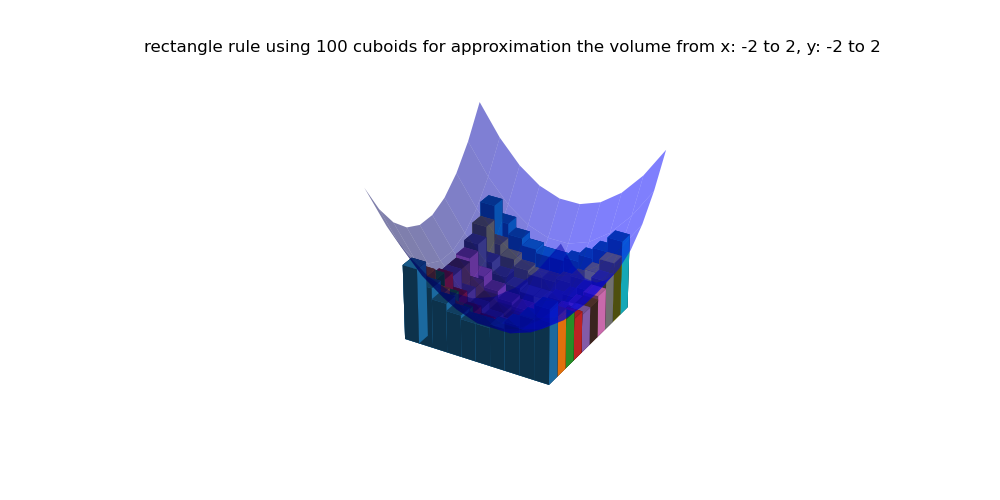

Result using rectangle method: 43.51999999999999
Result using scipy method: 42.666666666666664

Difference: 0.8533333333333246


In [20]:
plot_3d(f, 'rectangle', 10, -2, 2, -2, 2)

## Trapezoid rule

Representing this: $\int_c^d \int_a^b f(x,y) \, dx \, dy \approx$ 

Using the trapezoid rule:

Minimum value of the function at the four corners:
$$
f_{k min} = min \left(f\left(a + k\frac{b-a}{n} , c + k\frac{d-c}{n}\right), 
f\left(a + (k+1)\frac{b-a}{n}, c + k\frac{d-c}{n}\right),
f\left(a + k\frac{b-a}{n},c + (k+1)\frac{d-c}{n}\right), 
f\left(a + (k+1)\frac{b-a}{n} , c + (k+1)\frac{d-c}{n}\right)\right)
$$

Maximum value of the function at the four corners:
$$
f_{k max} = min \left(f\left(a + k\frac{b-a}{n} , c + k\frac{d-c}{n}\right), 
f\left(a + (k+1)\frac{b-a}{n}, c + k\frac{d-c}{n}\right),
f\left(a + k\frac{b-a}{n},c + (k+1)\frac{d-c}{n}\right), 
f\left(a + (k+1)\frac{b-a}{n} , c + (k+1)\frac{d-c}{n}\right)\right)
$$

Summing up the the trapezoids:
$$
\frac{b-a}{n} \cdot \frac{d-c}{n}
\sum_{k=0}^{n-1}
\frac{f_{k max} + f_{k min}}{2} 
$$

## Trapezoid rule

In [7]:
def get_trapezoid_coords(x1, x2, y1, y2, z_min, z_max, f):
    """
    Helper function that creates the coordinates for each of the trapezoids
    that are then plotted with plot_surface
    """

    x = [
        [x1, x2, x2, x1, x1],  # x coordinate of points in bottom surface
        [x1, x2, x2, x1, x1],  # x coordinate of points in upper surface
        [x1, x2, x2, x1, x1],  # x coordinate of points in outside surface
        [x1, x2, x2, x1, x1]]  # x coordinate of points in inside surface
    y = [
        [y1, y1, y2, y2, y1],  # y coordinate of points in bottom surface
        [y1, y1, y2, y2, y1],  # y coordinate of points in upper surface
        [y1, y1, y1, y1, y1],  # y coordinate of points in outside surface
        [y2, y2, y2, y2, y2]]  # y coordinate of points in inside surface
    
    # does not use the correct z value for the corners that are not z min/ max
    # and uses the actual value of the function this point for plotting
    # to match the trapezoid 
    
    z = [[0, 0, 0, 0, 0],                                        # z coordinate of points in bottom surface
        [f(x1, y1),f(x2, y1),f(x2, y2),f(x1, y2),f(x1, y1),],    # z coordinate of points in upper surface
        [f(x1, y1),f(x2, y1),f(x2, y1),f(x1, y1),f(x1, y1),],    # z coordinate of points in outside surface
        [f(x1, y2), f(x2, y2), f(x2, y2), f(x1, y2), f(x1, y2)]] # z coordinate of points in inside surface

    return x, y, z

Function that does the trapezoid integration:

In [8]:
def trapezoid_integration_2d(f, n=5, x_start=0, x_end=1, y_start=0, y_end=1):
    """
    Calculates the area under given function f using the trapezoid method,
    also returns coordinates of the rectangeles used for the calculation

    :param f: function that will be integrated
    :param n: number of steps
    :param x_start: start value x axis
    :param x_end: end value x axis
    :param y_start: start value y axis
    :param y_end: end value y axis
    :return: volume of area under function and numpy array of rectangle coordinates
    """

    # length of the steps in x,y
    x_step = (x_end - x_start) / n
    y_step = (y_end - y_start) / n

    # "left" value of current rectangle in x,y
    x1 = x_start
    y1 = y_start

    # init volume with 0
    volume = 0

    # save coordinates of the cubes
    cube_coordinates = []

    # x axis iteration
    for _ in range(0, n):
        # "right" value of current rectangle in x
        x2 = x1 + x_step

        # y axis iteration
        for _ in range(0, n):
            # "right" value of current rectangle in y
            y2 = y1 + y_step

            # get function results at the four corners
            f1 = f(x1, y1)
            f2 = f(x1, y2)
            f3 = f(x2, y1)
            f4 = f(x2, y2)

            f_results = [f1, f2, f3, f4]

            z_min = min(f_results)
            z_max = max(f_results)

            # add current trapezoid to volume
            volume += ((z_max + z_min) / 2) * x_step * y_step
            # save coords of cube
            # format {x_1: 0, x_2: 1, y_1: 1, y_2: 1, z: 1}
            coords = get_trapezoid_coords(x1, x2, y1, y2, z_min, z_max, f)
            cube_coordinates.append(coords)

            # change next left value to current right... go to next rectangle
            y1 = y2
        # reset left value after going over y axis
        y1 = y_start

        # change next left value to current right... go to next rectangle
        x1 = x2

    return volume, np.array(cube_coordinates)


res, coordinates = trapezoid_integration_2d(f, 10, -2, 2, -2, 2)



## Plotting the trapezoid rule

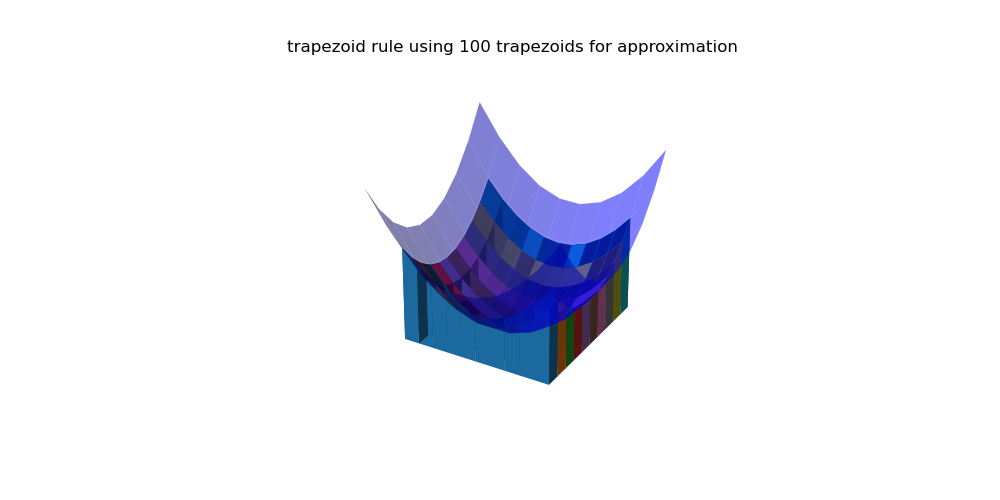

Result using trapezoid method: 43.51999999999999
Result using scipy method: 42.666666666666664

Difference: 0.8533333333333246


In [9]:
plot_3d(f, 'trapezoid', 10, -2, 2, -2, 2)

## Testing other functions

In [10]:
def g(x,y):
    return np.cos(x) + np.sin(y)

def h(x,y):

    return np.sin(x) * np.cos(y)

def j(x,y):
    return x + y

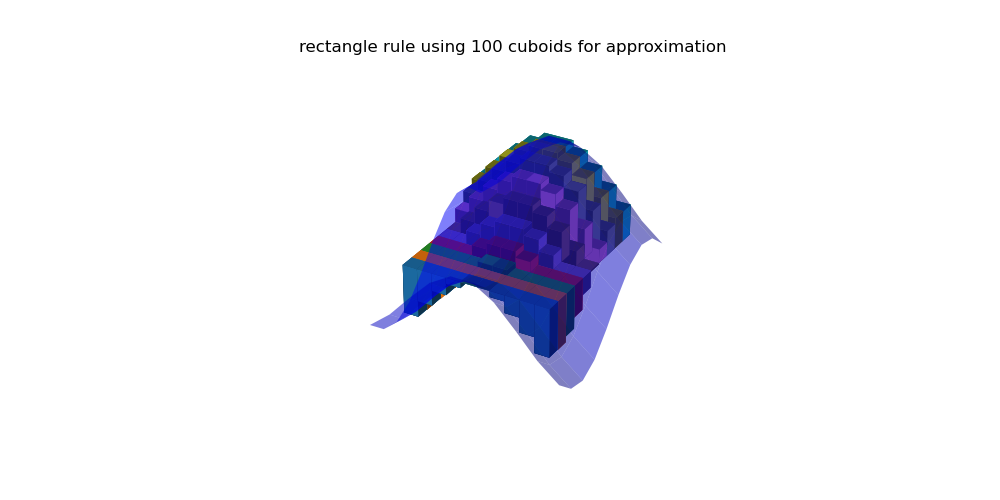

Result using rectangle method: 7.177128055205966
Result using scipy method: 7.274379414605453

Difference: 0.09725135939948704


In [11]:
plot_3d(g, 'rectangle', 10, -2, 2, -2, 2)

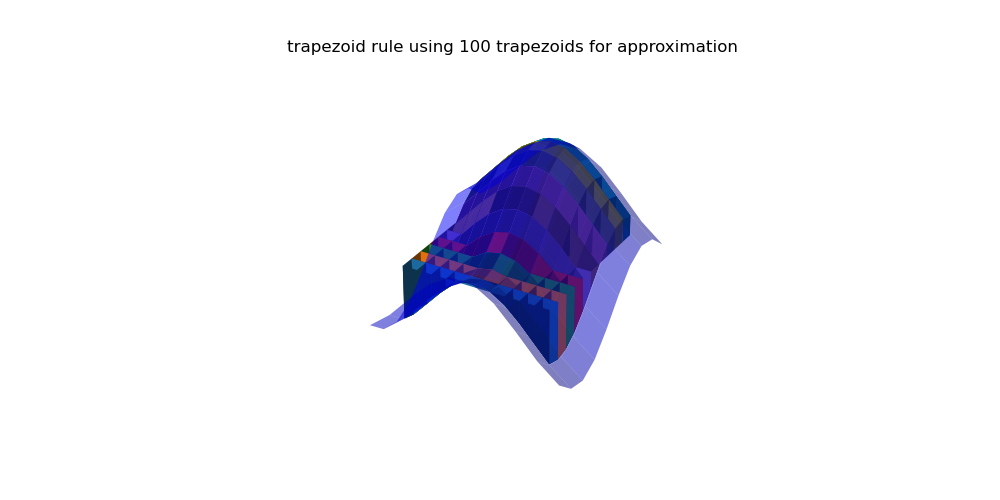

Result using trapezoid method: 7.177128055205966
Result using scipy method: 7.274379414605453

Difference: 0.09725135939948704


In [12]:
plot_3d(g, 'trapezoid', 10, -2, 2, -2, 2)

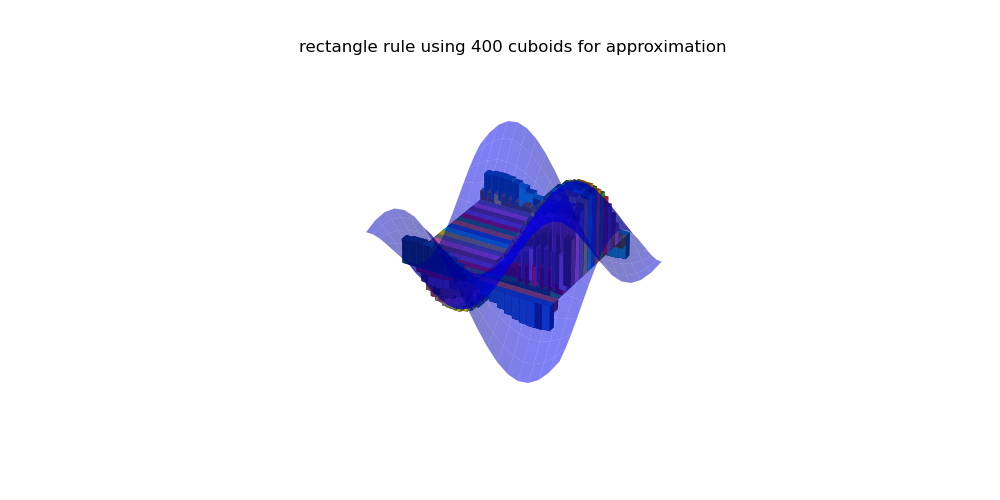

Result using rectangle method: -1.2420620087993939e-15
Result using scipy method: 0.0

Difference: 1.2420620087993939e-15


In [13]:
plot_3d(h, 'rectangle', 20, -2, 2, -2, 2)

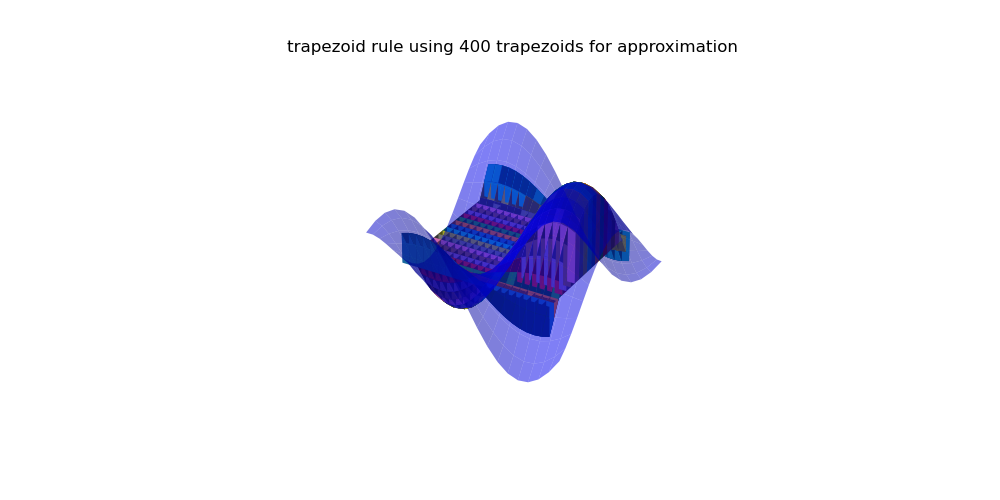

Result using trapezoid method: 2.8449465006019636e-16
Result using scipy method: 0.0

Difference: 2.8449465006019636e-16


In [14]:
plot_3d(h, 'trapezoid', 20, -2, 2, -2, 2)

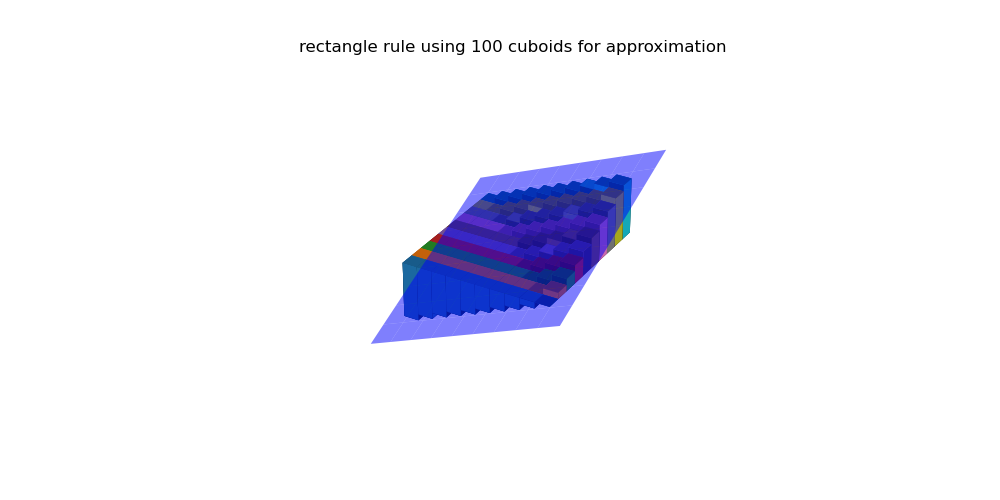

Result using rectangle method: 8.881784197001252e-16
Result using scipy method: 0.0

Difference: 8.881784197001252e-16


In [15]:
plot_3d(j, 'rectangle', 10, -2, 2, -2, 2)

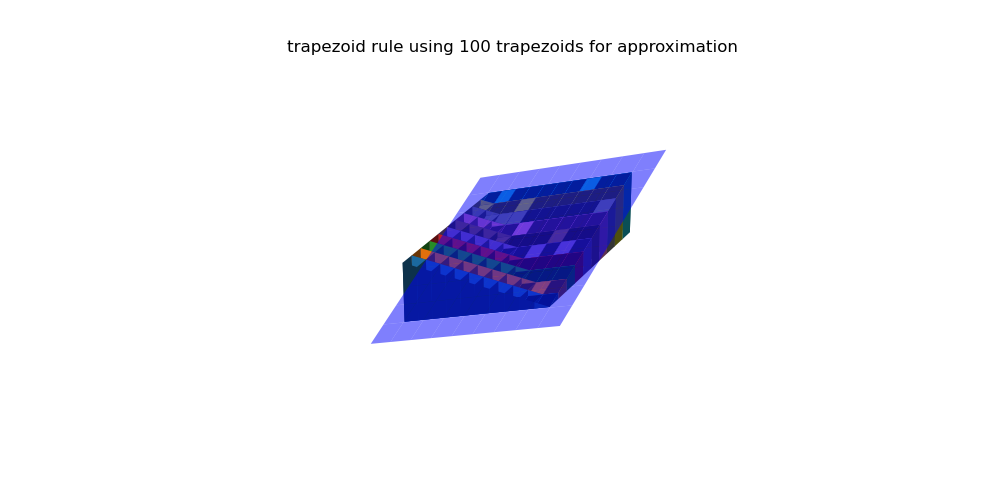

Result using trapezoid method: 5.551115123125783e-16
Result using scipy method: 0.0

Difference: 5.551115123125783e-16


In [16]:
plot_3d(j, 'trapezoid', 10, -2, 2, -2, 2)